In [7]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


def load_data():
    df2 = pd.read_csv('ref129_latest.csv')

    # drop rows where target variable deriv_cog_impair is missing
    df = df2.dropna(subset=['deriv_cog_impair'])

    # Separate features and target variable
    X = df.drop(columns=['subject_sp_id','asd','deriv_cog_impair']) 
    y = df['deriv_cog_impair']

    return X, y, df


def create_model(eval_metrics):
    return XGBClassifier(n_estimators=100, learning_rate=0.1, eval_metric=eval_metrics, early_stopping_rounds=5)


def main():
    X, y, df = load_data()

    # Perform cross validation (manually, using a for loop, for finer control)
    # place the entire block of dividing datasets, model fitting, and testing within loop

    k = 10

    eval_metrics = ["auc"]
    results = []

    # Loop over each fold
    for i in range(k):
        # Split data into training and test sets for current fold
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=i)

        eval_set = [(X_train, y_train), (X_val, y_val)]

        # Create and fit model for current fold
        model = create_model(eval_metrics)
        model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

        # Evaluate model on test set for current fold
            # score = model.score(X_test, y_test)
            # results.append(score)
        # auc_score = model.score(X_test, y_test)
        auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        results.append(auc_score)
    
    # Calculate average score and standard deviation
    avg_auc_score = np.mean(results)
    std_dev = np.std(results)

    print("\n AUC scores: \n")

    print(f"Average score: {avg_auc_score}")
    print(f"Standard deviation: {std_dev}")

    
    # Store predictions in a new column in the original dataframe
    df.loc[X.index, 'ml_pred_cog_score'] = model.predict(X)

    # Save dataframe with new column to csv file
    df.to_csv('ref129_with_ml_pred.csv', index=False)


if __name__ == "__main__":
    main()

[0]	validation_0-auc:0.84548	validation_1-auc:0.83582
[1]	validation_0-auc:0.84964	validation_1-auc:0.84154
[2]	validation_0-auc:0.85306	validation_1-auc:0.84573
[3]	validation_0-auc:0.85504	validation_1-auc:0.84710
[4]	validation_0-auc:0.85689	validation_1-auc:0.84815
[5]	validation_0-auc:0.85787	validation_1-auc:0.84939
[6]	validation_0-auc:0.85903	validation_1-auc:0.84915
[7]	validation_0-auc:0.85953	validation_1-auc:0.84984
[8]	validation_0-auc:0.86067	validation_1-auc:0.84971
[9]	validation_0-auc:0.86189	validation_1-auc:0.85096
[10]	validation_0-auc:0.86258	validation_1-auc:0.85068
[11]	validation_0-auc:0.86407	validation_1-auc:0.85068
[12]	validation_0-auc:0.86505	validation_1-auc:0.85026
[13]	validation_0-auc:0.86588	validation_1-auc:0.85105
[14]	validation_0-auc:0.86659	validation_1-auc:0.85109
[15]	validation_0-auc:0.86790	validation_1-auc:0.85074
[16]	validation_0-auc:0.86872	validation_1-auc:0.85083
[17]	validation_0-auc:0.86971	validation_1-auc:0.85053
[18]	validation_0-au

# Test on entire data

[0]	validation_0-auc:0.84548	validation_1-auc:0.83582
[1]	validation_0-auc:0.84964	validation_1-auc:0.84154
[2]	validation_0-auc:0.85306	validation_1-auc:0.84573
[3]	validation_0-auc:0.85504	validation_1-auc:0.84710
[4]	validation_0-auc:0.85689	validation_1-auc:0.84815
[5]	validation_0-auc:0.85787	validation_1-auc:0.84939
[6]	validation_0-auc:0.85903	validation_1-auc:0.84915
[7]	validation_0-auc:0.85953	validation_1-auc:0.84984
[8]	validation_0-auc:0.86067	validation_1-auc:0.84971
[9]	validation_0-auc:0.86189	validation_1-auc:0.85096
[10]	validation_0-auc:0.86258	validation_1-auc:0.85068
[11]	validation_0-auc:0.86407	validation_1-auc:0.85068
[12]	validation_0-auc:0.86505	validation_1-auc:0.85026
[13]	validation_0-auc:0.86588	validation_1-auc:0.85105
[14]	validation_0-auc:0.86659	validation_1-auc:0.85109
[15]	validation_0-auc:0.86790	validation_1-auc:0.85074
[16]	validation_0-auc:0.86872	validation_1-auc:0.85083
[17]	validation_0-auc:0.86971	validation_1-auc:0.85053
[18]	validation_0-au

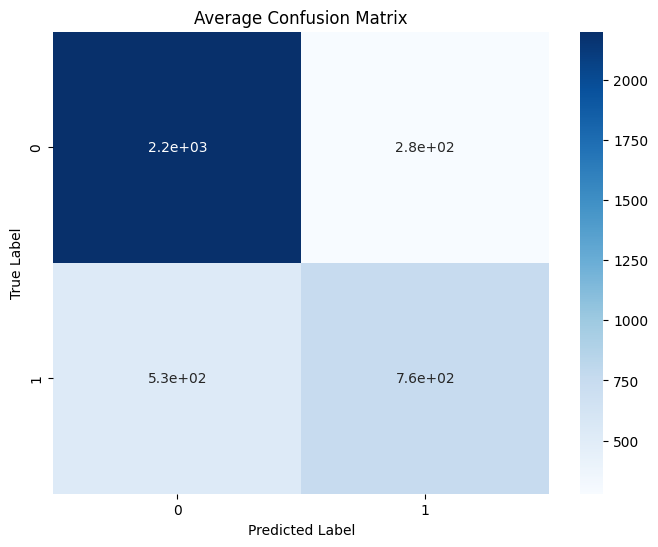

PermissionError: [Errno 13] Permission denied: 'ref129_with_ml_pred_TOT.csv'

In [30]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


def load_data():
    df2 = pd.read_csv('ref129_latest.csv')

    # TOTAL PREDICTION DATASET
    X2 = df2.drop(columns=['subject_sp_id','asd','deriv_cog_impair']) 
    y2 = df2['deriv_cog_impair']

    # MODEL TRAINING DATASET 
    # drop rows where target variable deriv_cog_impair is missing
    df = df2.dropna(subset=['deriv_cog_impair'])

    # Separate features and target variable
    X = df.drop(columns=['subject_sp_id','asd','deriv_cog_impair']) 
    y = df['deriv_cog_impair']
    
    return X, y, df, df2, y2, X2


def create_model(eval_metrics):
    return XGBClassifier(n_estimators=100, learning_rate=0.1, eval_metric=eval_metrics, early_stopping_rounds=5)


def main():
    X, y, df, df2, y2, X2 = load_data()

    # Perform cross validation (manually, using a for loop, for finer control)
    # place the entire block of dividing datasets, model fitting, and testing within loop

    k = 10

    eval_metrics = ["auc"]
    results = []
    confusion_matrices = []

    # Loop over each fold
    for i in range(k):
        # Split data into training and test sets for current fold
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=i)

        eval_set = [(X_train, y_train), (X_val, y_val)]

        # Create and fit model for current fold
        model = create_model(eval_metrics)
        model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

        # Evaluate model on test set for current fold
        auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        results.append(auc_score)

        # Calculate confusion matrix for current fold
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices.append(cm)
    
    # Calculate average score and standard deviation
    avg_auc_score = np.mean(results)
    std_dev = np.std(results)

    print("\n AUC scores: \n")

    print(f"Average score: {avg_auc_score}")
    print(f"Standard deviation: {std_dev}")

    
    # Store predictions in a new column in the original dataframe
    df2.loc[X2.index, 'TOT_ml_pred_cog_score'] = model.predict(X2)

    # Save dataframe with new column to csv file
    df2.to_csv('ref129_with_ml_pred_TOT.csv', index=False)


if __name__ == "__main__":
    main()